# Ground Truth Creation

### Code Dependencies

##### a) General libraries and functions

In [1]:
%%capture
import os
import cv2
import csv
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

##### b) Generating ground truth

In [2]:
import os
import pickle
import scipy.io

In [15]:
def draw_bounding_boxes(image_path, key, box_size=100):
    # Function to draw a bounding box on an image
    def draw_box(event, x, y, flags, param):
        nonlocal x_init, y_init, drawing, top_left_pt, bottom_right_pt, gt_boxes

        # If left button is clicked, start drawing
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            x_init, y_init = x, y

        # If left button is released, draw the bounding box
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            x_diff, y_diff = x - x_init, y - y_init
            half_box_size = int(box_size / 2)
            top_left_pt = (x - half_box_size, y - half_box_size)
            bottom_right_pt = (x + half_box_size, y + half_box_size)
            cv2.rectangle(image, top_left_pt, bottom_right_pt, (255, 0, 0), 3)
            # Store the bounding box coordinates as a NumPy array
            gt_boxes.append(np.array([top_left_pt[0], top_left_pt[1], bottom_right_pt[0], bottom_right_pt[1]]))

    # Load the image to process with OpenCV
    image_data = scipy.io.loadmat(image_path)[key]
    image_data = cv2.normalize(image_data, None, 0, 255, cv2.NORM_MINMAX)
    image_data = image_data.astype(np.uint8)
    image = cv2.cvtColor(image_data, cv2.COLOR_GRAY2BGR)

    # Display the image in a window
    cv2.namedWindow('Ground truth')
    cv2.setMouseCallback('Ground truth', draw_box)

    drawing = False
    x_init, y_init = 0, 0
    top_left_pt, bottom_right_pt = (0, 0), (0, 0)
    gt_boxes = []

    while True:
        cv2.imshow('Ground truth', image)
        k = cv2.waitKey(1)

        # If 'q' key is pressed, exit
        if k == ord('q'):
            break

    cv2.destroyAllWindows()

    # Display the image with the bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return image_data, gt_boxes

In [16]:
def get_file_names(folder_path):
    file_names = []
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_names.append(file_name)
    return file_names

In [17]:
def save_data(image_data, gt_boxes, output_path, key):
    # Save the image in .mat format
    image_path = output_path + '.mat'
    scipy.io.savemat(image_path, {key: image_data})

    # Save the ground truth bounding boxes using pickle
    gt_boxes_path = output_path + '_gt.pkl'
    with open(gt_boxes_path, 'wb') as f:
        pickle.dump(gt_boxes, f)

In [25]:
def create_ground_truth(path_no_surface, output_folder, key):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    file_names = get_file_names(path_no_surface)

    for reconstruction in file_names:
        image_path = os.path.join(path_no_surface, reconstruction)
        output_path = os.path.join(output_folder, os.path.splitext(reconstruction)[0])

        # Draw the bounding boxes
        image_data, gt_boxes = draw_bounding_boxes(image_path, key)

        # Save the image and ground truth
        save_data(image_data, gt_boxes, output_path, key)


### Ground-truth creation

-----------------------
#### 1- Images without surface base

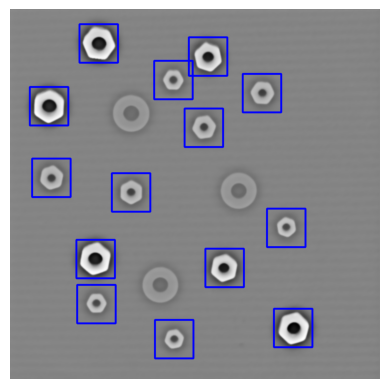

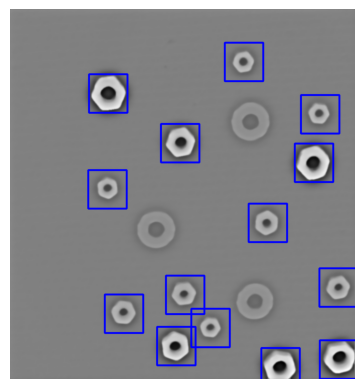

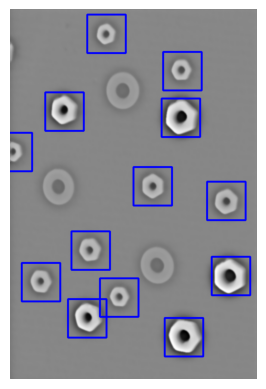

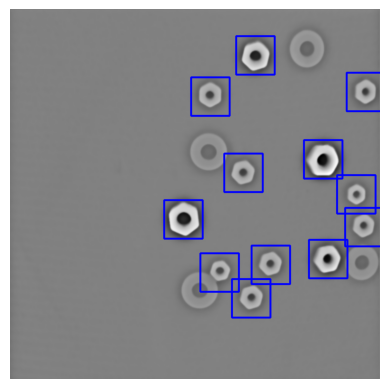

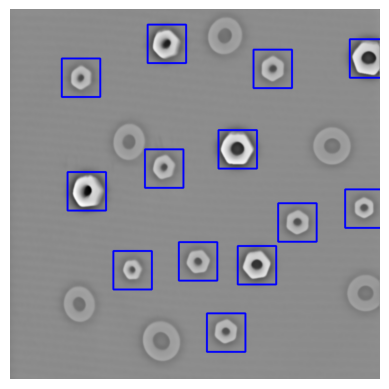

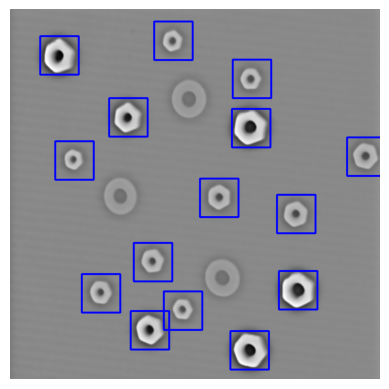

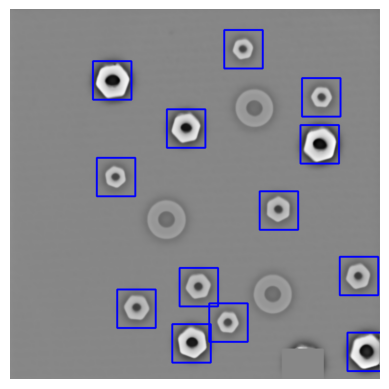

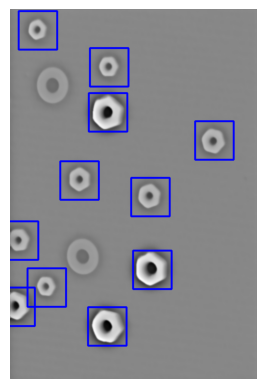

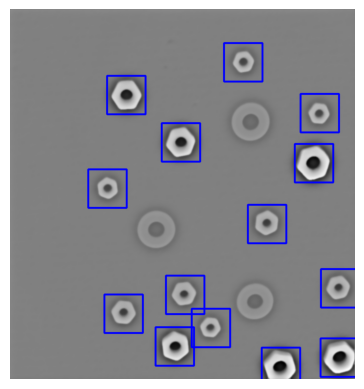

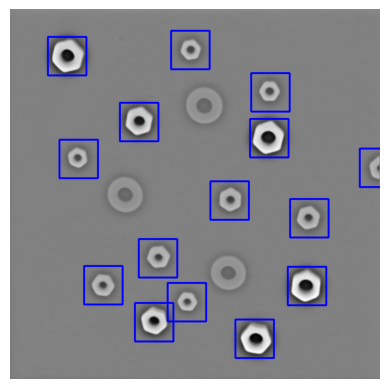

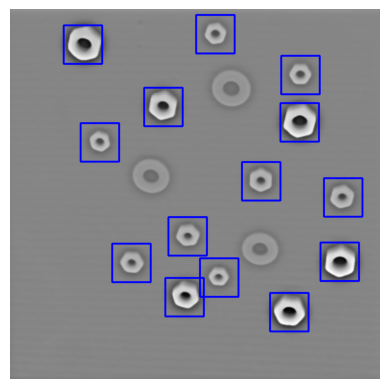

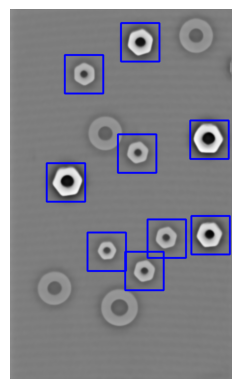

In [21]:
path_no_surface = '../Data/MATLAB/Reconstructions/without_surface_base/'
output_folder = '../Data/MATLAB/ProcessedData/without_surface_base/'

create_ground_truth(path_no_surface, output_folder, key='Spz')

----------------
#### 2- Images with surface base

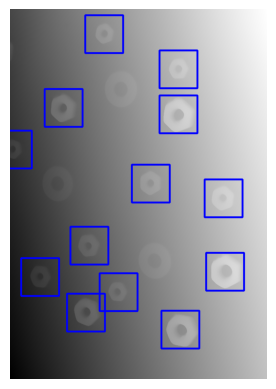

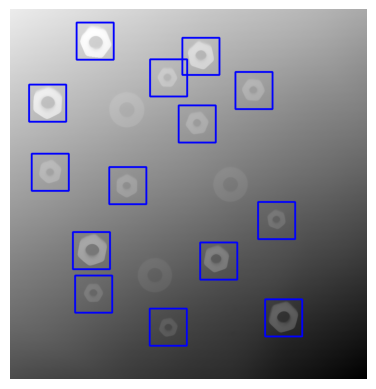

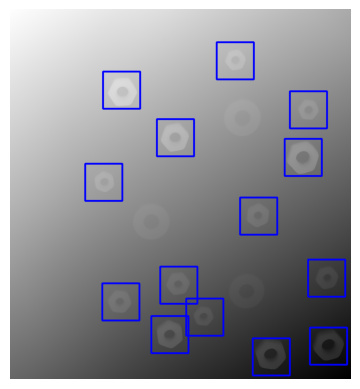

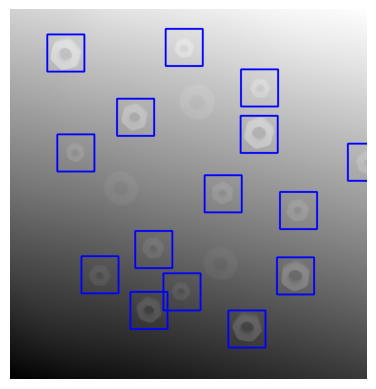

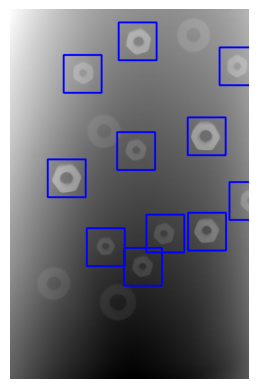

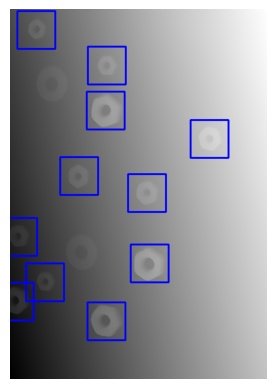

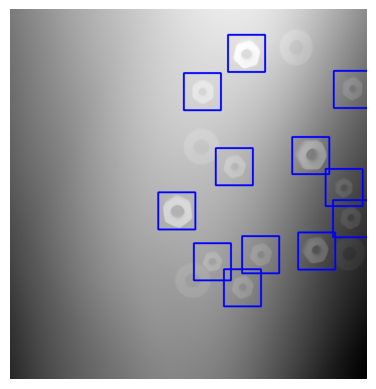

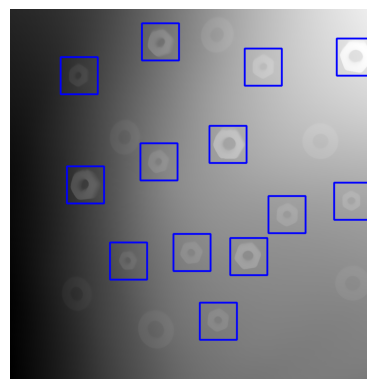

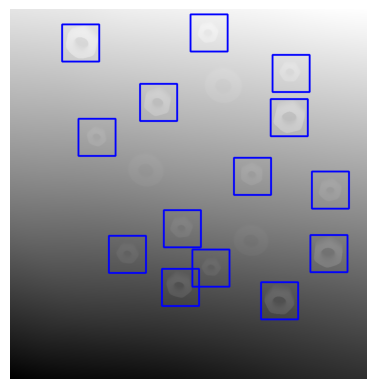

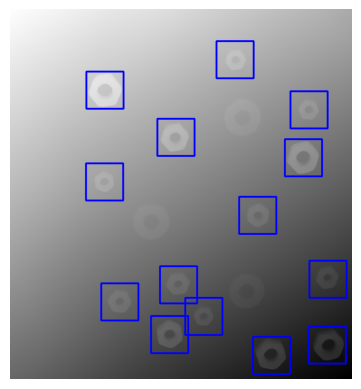

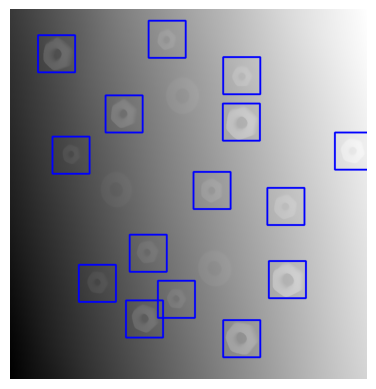

/tmp/ipykernel_5860/3637343236.py:25: RuntimeWarning: invalid value encountered in cast
  image_data = image_data.astype(np.uint8)


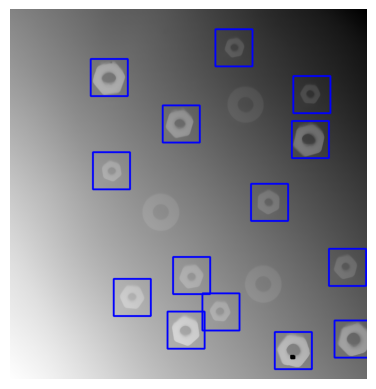

In [26]:
path_with_surface = '../Data/MATLAB/Reconstructions/with_surface_base/'
output_folder = '../Data/MATLAB/ProcessedData/with_surface_base/'

create_ground_truth(path_with_surface, output_folder, key='ZcM_r')